<a href="https://colab.research.google.com/github/aditipatil0711/SJSU_Masters_Assignments/blob/main/CMPE255_Data_Mining/Assignment8/UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing UMAP For Clustering and Classification Applications

Dataset Used: Wine Dataset on Kaggle

1. **Understanding the Dataset**: We will start by loading and understanding the Wine dataset. This involves examining its features, data types, and any preprocessing steps that may be necessary.

2. **Data Preprocessing**: This includes handling missing values, normalizing data, and possibly encoding categorical variables if present.

3. **Introduction to UMAP**: Before applying UMAP, we'll discuss what UMAP is, how it works, and why it's a powerful tool for dimensionality reduction.

4. **Applying UMAP for Dimensionality Reduction**: We'll use UMAP to reduce the dimensions of our dataset. We'll explore different parameters and observe how they affect the results.

5. **Classification and Clustering**: Post-dimensionality reduction, we'll perform classification and clustering to demonstrate the utility of UMAP in these contexts.

6. **Analysis and Inferences**: Finally, we will analyze the results and draw inferences about the effectiveness of UMAP in dimensionality reduction and its impact on classification and clustering tasks.


In [ ]:
import pandas as pd
import os
from google.colab import files

In [ ]:
  # upload the file
uploaded = files.upload()

Saving Wine Dataset.zip to Wine Dataset.zip






1. **Loading Data and Preprocessing**:
   - Load the dataset
   - Check for missing values.
   - Normalize the data since UMAP and many clustering/classification algorithms perform better with normalized data.


In [ ]:
import zipfile
import os

# Path to the uploaded zip file
zip_file_path = '/content/Wine Dataset.zip'

# Extracting the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

# Listing the contents of the extracted folder to find the dataset file
extracted_files = os.listdir('/content')
extracted_files


['.config', 'wine-clustering.csv', 'Wine Dataset.zip', 'sample_data']

In [ ]:
# Re-importing necessary libraries and loading the dataset, considering the environment is empty
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Re-loading the dataset
wine_data = pd.read_csv('/content/wine-clustering.csv')

# Checking for missing values in the dataset
missing_values = wine_data.isnull().sum()

# Displaying the missing values information
missing_values



Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


### Next Steps in Preprocessing:

1. **Normalize the Data**: Since all features are numerical, we'll use standard normalization to scale our dataset. This is particularly important for algorithms like UMAP and many clustering and classification models, as they can be sensitive to the scale of the data.



In [ ]:
# Normalizing the dataset using StandardScaler
scaler = StandardScaler()
wine_data_normalized = scaler.fit_transform(wine_data)

# Converting the normalized data back to a DataFrame for ease of use
wine_data_normalized_df = pd.DataFrame(wine_data_normalized, columns=wine_data.columns)

# Displaying the first few rows of the normalized data
wine_data_normalized_df.head()



,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874



### Next Steps:

1. **Initial Clustering (Before UMAP)**: Apply clustering to the normalized dataset and visualize the clusters.
2. **Initial Classification (Before UMAP)**: Train a classification model and visualize the results.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


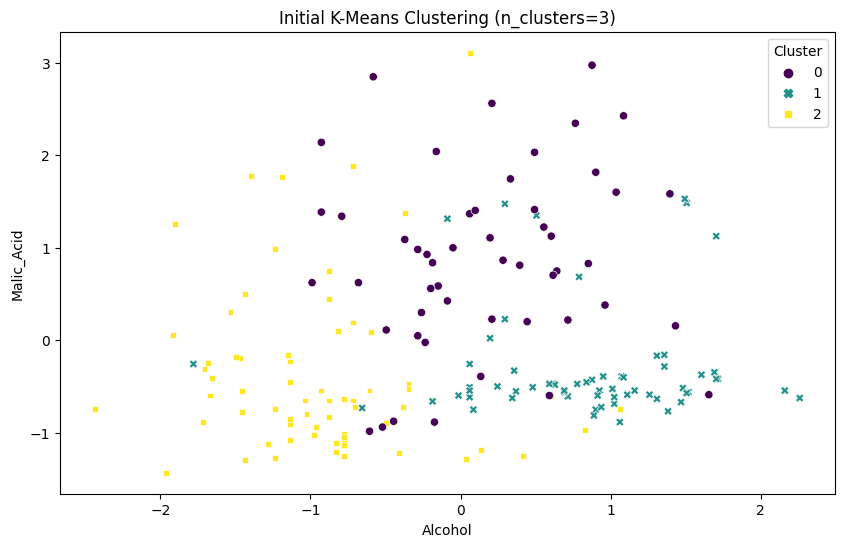

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Choosing an arbitrary number of clusters for initial K-means clustering
# Typically, the optimal number of clusters would be determined through methods like the elbow method
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(wine_data_normalized_df)

# Adding the cluster labels to the DataFrame for visualization
wine_data_normalized_df['Cluster'] = clusters

# Visualizing the clusters using the first two features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=wine_data_normalized_df.iloc[:, 0], y=wine_data_normalized_df.iloc[:, 1],
                hue=wine_data_normalized_df['Cluster'], palette='viridis', style=wine_data_normalized_df['Cluster'])
plt.title(f'Initial K-Means Clustering (n_clusters={n_clusters})')
plt.xlabel(wine_data_normalized_df.columns[0])
plt.ylabel(wine_data_normalized_df.columns[1])
plt.legend(title='Cluster')
plt.show()


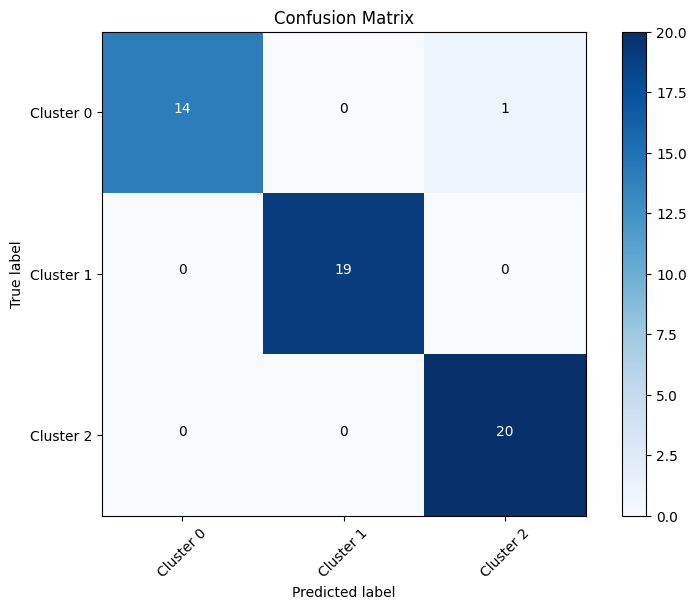

(0.9814814814814815,
 '              precision    recall  f1-score   support\n\n           0       1.00      0.93      0.97        15\n           1       1.00      1.00      1.00        19\n           2       0.95      1.00      0.98        20\n\n    accuracy                           0.98        54\n   macro avg       0.98      0.98      0.98        54\nweighted avg       0.98      0.98      0.98        54\n')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import itertools

# For demonstration, let's assume the last column 'Cluster' as our target variable for classification
X = wine_data_normalized_df.drop('Cluster', axis=1)
y = wine_data_normalized_df['Cluster']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = rf_classifier.predict(X_test)

# Calculating accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Computing confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plotting non-normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=[f'Cluster {i}' for i in range(n_clusters)])
plt.show()

accuracy, clf_report




### Next Steps:

1. **Dimensionality Reduction with UMAP**: We'll now apply UMAP to reduce the dimensionality of the data.
2. **Clustering and Classification Post-UMAP**: Perform clustering and classification on the UMAP-transformed data and visualize the results.
3. **Analysis and Comparison**: Compare these results with the pre-UMAP clustering and classification to assess the impact of UMAP.


In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=ecc62373aa666efdb611926da0ce1d3c14878a917c0b43660db9f4910abc043b
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
from umap import UMAP

# Applying UMAP for dimensionality reduction
# Reducing to 2 dimensions for easy visualization
umap_model = UMAP(n_components=2, random_state=42)
wine_data_umap = umap_model.fit_transform(wine_data_normalized_df.drop('Cluster', axis=1))

# Creating a DataFrame for the UMAP transformed data
wine_data_umap_df = pd.DataFrame(wine_data_umap, columns=['UMAP1', 'UMAP2'])
wine_data_umap_df['Cluster'] = wine_data_normalized_df['Cluster']

# Displaying the first few rows of the UMAP transformed data
wine_data_umap_df.head()


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,UMAP1,UMAP2,Cluster
0,6.551203,4.278267,1
1,5.477433,4.527971,1
2,5.308706,3.074546,1
3,6.385405,2.961869,1
4,4.174666,3.879383,1


In [ ]:
# Assuming wine_data_umap is a numpy array or similar structure with two columns
wine_data_umap_df = pd.DataFrame(wine_data_umap, columns=['UMAP1', 'UMAP2'])

# If you have the original cluster labels from the non-UMAP data
wine_data_umap_df['Original_Cluster'] = wine_data_normalized_df['Cluster']

# Displaying the first few rows of the UMAP transformed data
print(wine_data_umap_df.head())


      UMAP1     UMAP2  Original_Cluster
0  6.551203  4.278267                 1
1  5.477433  4.527971                 1
2  5.308706  3.074546                 1
3  6.385405  2.961869                 1
4  4.174666  3.879383                 1



Given the UMAP-transformed data (`UMAP1` and `UMAP2` representing the two reduced dimensions), the next steps are as follows:

1. **Visualizing Clustering Post-UMAP**: We will visualize the clusters in this new two-dimensional UMAP space. This will help us understand how the clusters are distributed in the reduced dimensions.

2. **Clustering Post-UMAP**: We will reapply a clustering algorithm (like K-means) to the UMAP-transformed data and compare the clusters to those obtained from the original data.

3. **Classification Post-UMAP**: We will train a classification model on the UMAP-transformed data. The performance of this model can be compared to the earlier model trained on the original data.

4. **Visualizing Classification Results Post-UMAP**: We'll visualize the classification results using a confusion matrix and other relevant metrics.

5. **Analysis and Comparison**: Finally, we will analyze and compare these results with the initial clustering and classification to assess the impact of UMAP.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


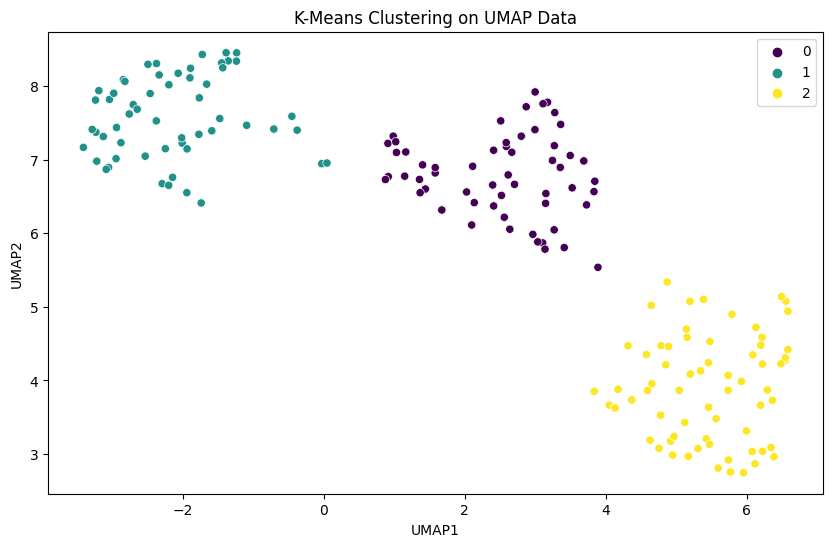

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
wine_data_umap_df['UMAP_Cluster'] = kmeans.fit_predict(wine_data_umap_df[['UMAP1', 'UMAP2']])

# Visualization of Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='UMAP_Cluster', data=wine_data_umap_df, palette='viridis')
plt.title('K-Means Clustering on UMAP Data')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend()
plt.show()


In [ ]:

# Classification
X_umap = wine_data_umap_df[['UMAP1', 'UMAP2']]
y_umap = wine_data_umap_df['UMAP_Cluster']
X_train, X_test, y_train, y_test = train_test_split(X_umap, y_umap, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)



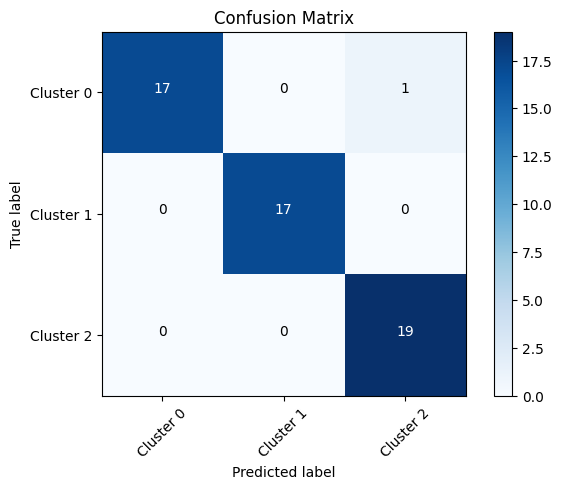

Accuracy: 0.9814814814814815
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       1.00      1.00      1.00        17
           2       0.95      1.00      0.97        19

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [ ]:
#Classification Metrics
accuracy = accuracy_score(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix Visualization
# [Use the provided plot_confusion_matrix function from previous steps here]

plot_confusion_matrix(cm, classes=[f'Cluster {i}' for i in range(3)])
plt.show()

print("Accuracy:", accuracy)
print("Classification Report:\n", clf_report)
